# Jupyter notebook sample

In [13]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.src.layers import InputLayer, Dropout
from keras.src.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation
from sklearn.metrics import confusion_matrix

import tensorflow.keras as keras


%matplotlib inline
plt.style.use('default')


from tensorflow.keras import optimizers

### Loading MNIST data

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

In [14]:
from keras.src.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=keras.utils.to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=keras.utils.to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=keras.utils.to_categorical(y_test,10)

print(X_test[0])

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Visualization in IDE

Create graphs and visualizations that match your chosen color scheme.

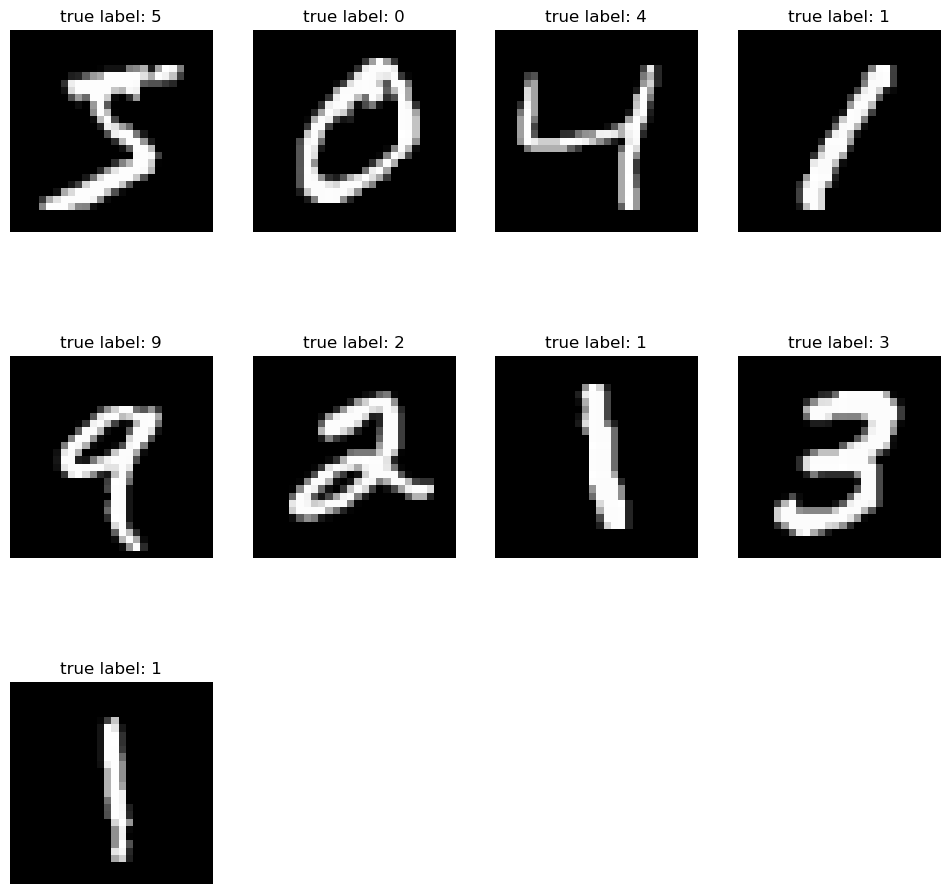

In [58]:
plt.figure(figsize=(12,12))
for i in range(0,9):
    plt.subplot(3,4,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.array2string(np.argmax(Y_train,axis=1)[i]))
    plt.axis('off')

In [16]:
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])
print(X_train_flat.shape)
print(Y_train.shape)
print(X_val_flat.shape)
print(Y_val.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 10)


In [17]:
# Just to get a feeling for available activation functions

#import keras.api.activations as activations
#activations.

In [18]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(None, 784)))
#model.add(Dense(100, shape=(None, 784)))
model.add(Dense(1000))
model.add(Activation('relu6'))
model.add(Dense(100))
model.add(Activation('relu6'))
model.add(Dense(50))
model.add(Activation('relu6'))
model.add(Dense(200))
model.add(Activation('relu6'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Bestes Ergebnis mit obiger Konfiguration, der Unterschied (mit oder ohne erste Dense Schicht) ist aber marginal, solange relu (leaky_relu, relu, relu6) als Aktivierungsfunktion verwendet wird

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 902,360 (3.44 MB)

 Trainable params: 902,360 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train_flat, Y_train, batch_size=128, epochs=10, validation_data=(X_val_flat,Y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8468 - loss: 0.5179 - val_accuracy: 0.9660 - val_loss: 0.1105
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9699 - loss: 0.1000 - val_accuracy: 0.9724 - val_loss: 0.0972
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9813 - loss: 0.0615 - val_accuracy: 0.9751 - val_loss: 0.0813
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9858 - loss: 0.0447 - val_accuracy: 0.9764 - val_loss: 0.0812
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0348 - val_accuracy: 0.9785 - val_loss: 0.0800
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0233 - val_accuracy: 0.9745 - val_loss: 0.0968
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9923 - loss: 0.0259 - val_accuracy: 0.9793 - val_loss: 0.0832
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.

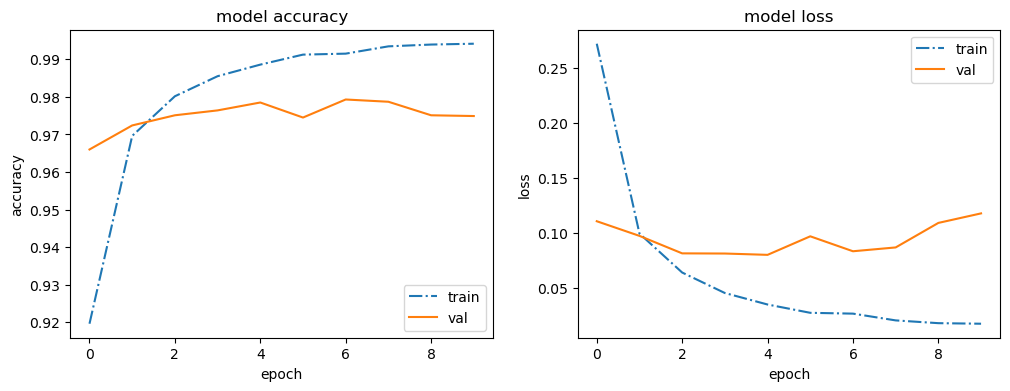

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [22]:
pred = model.predict(X_test_flat)
print(confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(pred, axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acc_fc_orig_flat = ", acc_fc_orig)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step
[[ 974    1    1    0    1    0    2    1    0    0]
 [   0 1126    1    0    0    1    2    3    2    0]
 [   4    0  996    3    1    0    0   24    4    0]
 [   1    0    2  992    0    5    0    7    2    1]
 [   1    2    4    1  959    0    2    2    1   10]
 [   4    0    0   17    1  856    7    1    4    2]
 [   3    3    0    0    9    3  937    0    3    0]
 [   0    1    6    0    1    0    1 1018    1    0]
 [   4    0    1    5    3    2    1   12  944    2]
 [   2    3    0    7    8    1    0   28    3  957]]
Acc_fc_orig_flat =  0.9759


# Convolutional Neural Network

In [23]:
model2 = Sequential()
model2.add(InputLayer(shape=(28,28,1)))
model2.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu')) # 1 (2,2) Kernel
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))
model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) # 1 (2,2) Kernel
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10))
# model2.add(Flatten())
model2.add(Activation('softmax')) # Wichtig! Wandelt 'Logits' (Resultate des Modells) in Wahrscheinlichkeiten um

model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,366 (1.27 MB)

 Trainable params: 333,366 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history2 = model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8125 - loss: 0.6038 - val_accuracy: 0.9797 - val_loss: 0.0771
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9820 - val_loss: 0.0612
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9820 - loss: 0.0584 - val_accuracy: 0.9881 - val_loss: 0.0446
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9861 - val_loss: 0.0459
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9897 - loss: 0.0348 - val_accuracy: 0.9879 - val_loss: 0.0417
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9896 - loss: 0.0314 - val_accuracy: 0.9893 - val_loss: 0.0411
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9905 - loss: 0.0280 - val_accuracy: 0.9883 - val_loss: 0.0415
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9925 - loss: 0.0210 - val_accu

In [26]:
print(X_test[0].shape)
pred = model2.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(pred, axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acc_fc_orig_flat = ", acc_fc_orig)

(28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [   1    0 1028    0    1    0    0    2    0    0]
 [   0    0    2 1006    0    0    0    1    1    0]
 [   0    1    0    0  978    0    0    0    0    3]
 [   2    0    1   16    0  866    4    0    1    2]
 [   2    2    1    0    2    2  946    0    3    0]
 [   0    1    8    0    0    0    0 1016    1    2]
 [   2    0    3    2    0    0    0    2  960    5]
 [   0    3    1    4    7    3    0    0    0  991]]
Acc_fc_orig_flat =  0.99


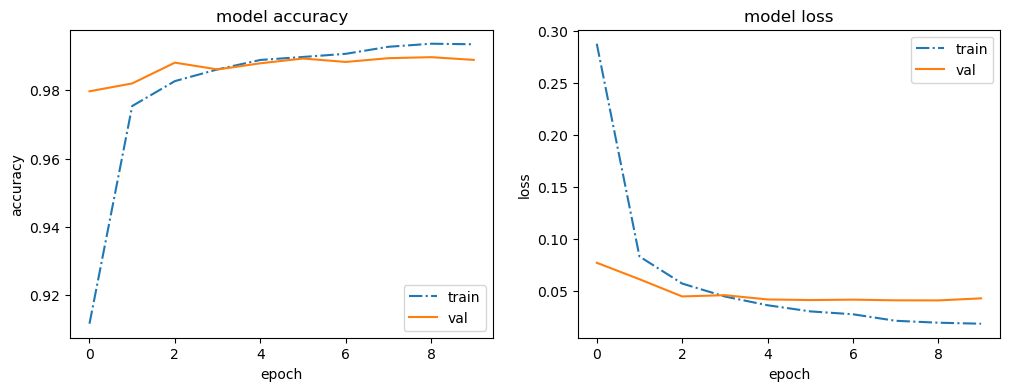

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], linestyle='-.')
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], linestyle='-.')
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Compare

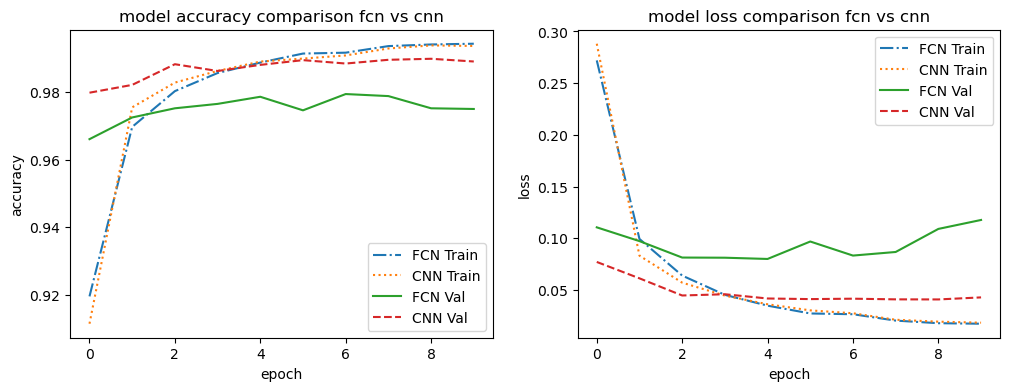

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], linestyle='-.')
plt.plot(history2.history['accuracy'], linestyle=':')
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'], linestyle='--')
plt.title('model accuracy comparison fcn vs cnn')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['FCN Train', 'CNN Train', 'FCN Val', 'CNN Val'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], linestyle='-.')
plt.plot(history2.history['loss'], linestyle=':')
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'], linestyle='--')
plt.title('model loss comparison fcn vs cnn')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['FCN Train', 'CNN Train', 'FCN Val', 'CNN Val'], loc='upper right')


# Save Models

In [29]:
model.save('./fcnn_model.keras')
model2.save('./cnn_model.keras')

# Test - Transfer learning

### Imports for part 2

In [30]:
import os
import numpy as np
import cv2
import traceback
from IPython.display import clear_output, Image, display
from io import BytesIO, StringIO
import PIL.Image
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
def show_image(a, test, fmt='jpeg'):
    print(f"{test}hi")
    faux_file = BytesIO()
    a = np.uint8(np.clip(a, 0, 255))
    PIL.Image.fromarray(a).save(faux_file, format=fmt)
    clear_output(True)
    imgdata = Image(data=faux_file.getvalue())
    display(imgdata)
    imgdata

    #plt.imshow(a, cmap='gray')
    #plt.axis('off')  # Achsen ausblenden
    #plt.show()

#show_image()
show_image(np.random.rand(512,512) * 255, "test")

In [32]:
def prepocessing(img):
    print("hi")
    to_classify = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    to_classify = cv2.bitwise_not(to_classify)
    to_classify[np.where(to_classify < 150)] = 0
    return to_classify



In [52]:
e6 = Sequential()
e6.add(InputLayer(shape=(28, 28, 1)))
e6.add(Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu'))  
e6.add(MaxPooling2D(pool_size=(2, 2)))
e6.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))  
e6.add(MaxPooling2D(pool_size=(2, 2)))
e6.add(Flatten())
e6.add(Dense(10, activation='softmax'))
#e6.add(Activation("softmax"))

e6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history2 = e6.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_val,Y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8122 - loss: 0.6463 - val_accuracy: 0.9715 - val_loss: 0.0982
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9725 - loss: 0.0887 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9844 - val_loss: 0.0543
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9825 - val_loss: 0.0584
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9896 - loss: 0.0327 - val_accuracy: 0.9844 - val_loss: 0.0510
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9908 - loss: 0.0288 - val_accurac

In [54]:
print(X_test[0].shape)
pred = e6.predict(X_test)
print(confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(pred, axis=1)))
acc_fc_orig = np.sum(np.argmax(Y_test,axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acc_fc_orig_flat = ", acc_fc_orig)

(28, 28, 1)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    2    0    0    1    1    0    2    0]
 [   7    1 1009    3    1    0    1    7    3    0]
 [   1    0    0  996    0    7    0    1    4    1]
 [   3    0    0    0  964    0    1    1    2   11]
 [   3    0    0    3    0  884    1    0    0    1]
 [   7    2    0    1    1    5  940    0    2    0]
 [   0    1    5    2    0    1    0 1009    2    8]
 [   6    0    2    2    0    1    1    0  958    4]
 [   2    2    1    1    2    4    0    1    1  995]]
Acc_fc_orig_flat =  0.9862


In [55]:
e6.save("./e6.keras")